Date and time  2022-01-21 14:57:44.690947
 
/home/selina/Documents/CometAnalysis/notebooks
image shape is:  (2048, 2048)


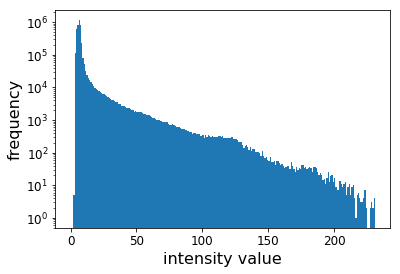

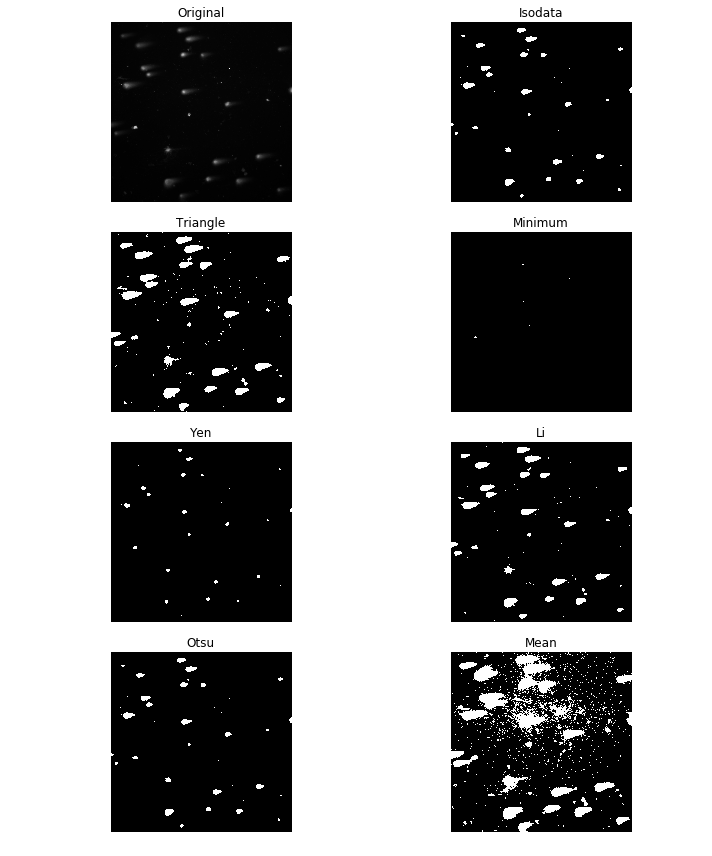

 
Date and time 2022-01-21 14:57:48.111883
Time since last check is 0:00:03.420936


In [45]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import glob
import os
import sys
import cv2
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt
import processing_defs as process
%matplotlib inline
!pwd
#

# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "Images\\ControlBatch\\0001.bmp"
imFile = "../CometImages/CA210609/Collated/4GyA/bmp/4GyA0027.bmp"
fileName = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]  #only file name with extension
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
print("image shape is: ", shape)
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgRaw[:, :]
#
#plot histogram of raw image intensities
fig, ax = plt.subplots(1)
#plt.title("Histogram of raw " + str(fileName))
# change font size for x axis
ax.tick_params(axis='both', which='major', labelsize=12)
#
plt.xlabel("intensity value", fontsize = 16)
plt.ylabel("frequency", fontsize = 16)
n, bins, patches = ax.hist(imgRaw.flatten(), bins=np.arange(0, maxPix, 1), log=True)
plt.show()
#
# plot range of thesholds 
fig, ax = try_all_threshold(imgArr, figsize=(10, 12), verbose=False)
plt.show()
#

"""
# TESTING TO SEE WHICH IMAGES HAVE THE CIRCULAR SHADOW ARTEFACT
image_dir = '../CometImages/CA210609/Collated/4GyC/bmp/*.bmp'  #where the image directory is - find all bmp files here
#image_dir = '../CometImages/4Gy/*.bmp'  #where the image directory is - find all bmp files here
#image_dir = '../CometImages/CA210609/Collated/1GyA/bmp/*.bmp'  #where the image directory is - find all bmp files here
#image_dir = '../CometImages/MC-pBreak/pBreak60/*.bmp'  #where the image directory is - find all bmp files here
#
fileList= sorted(glob.glob(image_dir))  #whole file path, as set in above line
#print("Files read in (whole path) are", fileList)
#
fileNames = [os.path.basename(x) for x in sorted(glob.glob(image_dir))]  #only file name with extension
print("\nFile names (with extension) are:", fileNames)
#
nFiles = len(fileNames)
print("\n",nFiles, " files will be analysed")
#
fileNamesSplit = np.empty((nFiles), dtype = 'object')
for n in range (0, nFiles):
    x = fileNames[n]
    fileNamesSplit[n] = os.path.splitext(x)[0]   #remove extension from file name
##
fileNameArray = np.empty((nFiles), dtype = 'object') #initialise empty 2d array to fill with strings for file name and type
mostPixArr = np.zeros(nFiles)
#
for n in range (0, nFiles):
    fileNameArray[n] = fileNamesSplit[n]
print("\nfileNameArray is: ", fileNameArray)   #without extension

for n in range (0, nFiles):
    print("analysing image ", fileList[n])
    imgRaw = plt.imread(fileList[n])
    shape = imgRaw.shape
    nRows = imgRaw.shape[0] # y coordinates
    nCols = imgRaw.shape[1] # x ccordinates
    maxPix = np.amax(imgRaw)
    mostPix = np.bincount(imgRaw.flatten()).argmax()
    mostPixArr[n] = mostPix
    print("The most common intensity value is: ", mostPix)
    print("image shape is: ", shape)
    #
    if len(shape) == 3:
        nDepth = imgRaw.shape[2]
    else:
        nDepth = 1
    #
    # Determine image format and process accordingly
    if nDepth == 4:
        imgRGB = process.rgba2rgb(imgRaw)
        imgGrey = process.rgb2grey(imgRGB, 1)
    elif nDepth == 3:
        imgRGB = imgRaw
        imgGrey = process.rgb2grey(imgRGB, 1)
    elif nDepth == 1:
        imgRGB = imgRaw
        imgGrey = imgRaw
    else:
        print(" ")
        print("Unexpected image depth",nDepth)
        sys.stop()
    #
    plt.imshow(imgGrey)
    plt.show()
    #
    thresh = np.array([10, 20])
    nThresh = len(thresh)
    imgThresh = np.zeros((nRows, nCols, nThresh))
    for t in range(0, nThresh):
        imgThresh[:, :, t] = imgGrey > thresh[t]
    #
    #plot thresholded images
    fig = plt.figure(figsize=(10,12))
    plt.subplot(1, 2, 1)
    fig.title = "thresholded raw image " + fileNames[n] + "at" + str(thresh[0])
    plt.imshow(imgThresh[:, :, 0])
    plt.subplot(1, 2, 2)
    fig.title = "thresholded raw image " + fileNames[n] + "at" + str(thresh[1])
    plt.imshow(imgThresh[:, :, 1])
    plt.show()
    #
    #plot histogram of raw image intensities
    fig, ax = plt.subplots(1)
    plt.title("Histogram of raw " + str(fileNames[n]))
    n, bins, patches = ax.hist(imgRaw.flatten(), bins=np.arange(0, maxPix, 1), log=True)
    plt.show()

print(mostPixArr)
"""
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Interesting thresholds we would like to investigate further are: 
    * Triangle
    * Otsu
    * Li
    * Isodata
### Comapring them with the basic 'threshold at this value' method that is currently implemented

Date and time  2022-01-21 15:07:10.137014
 
/home/selina/Documents/CometAnalysis/notebooks
4GyB009.bmp
min and max pixel values in imgArr are:  210.0 4.0
shape of imgThr is:  (2048, 2048)


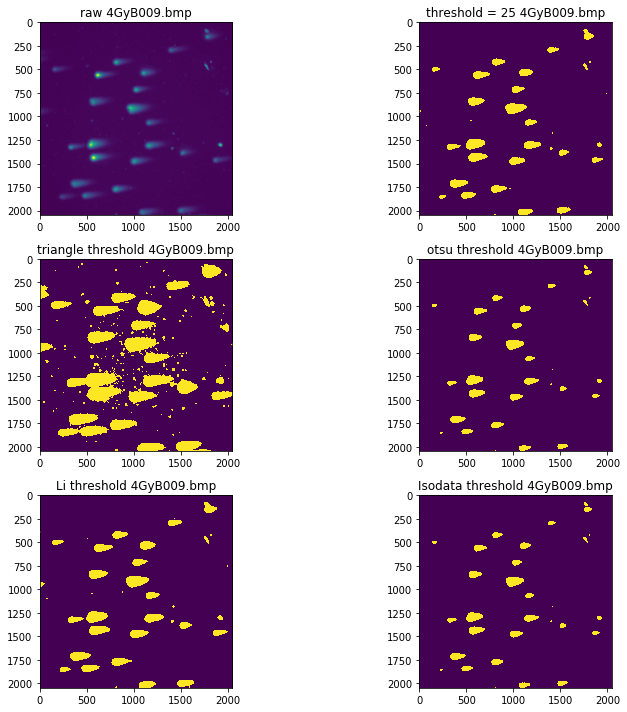

 
Date and time 2022-01-21 15:07:12.431821
Time since last check is 0:00:02.294807


In [48]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import sys
import cv2
import glob
import os
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import threshold_triangle, threshold_otsu, threshold_li, threshold_isodata
import matplotlib.pyplot as plt
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "Images\\ControlBatch\\0001.bmp"
imFile = "../CometImages/CA210609/Collated/4GyB/bmp/4GyB009.bmp"
#imFile = '../CometImages/4Gy/4Gy 0h-2irrad.bmp'
fileName = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]
print(fileName)
#imFile = "transformed4GyA0012.bmp"
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgRaw[:, :]
#
maxPix = np.amax(imgArr)
minPix = np.amin(imgArr)
print("min and max pixel values in imgArr are: ", maxPix, minPix)
#apply basic threshold to image
thresh = 25
imgThr = np.zeros((nRows, nCols))
imgThr[:, :] = imgArr > thresh
print("shape of imgThr is: ", imgThr.shape)
#apply all the interesting thresholds
threshTri = threshold_triangle(imgArr)
imgTri= imgArr > threshTri

threshOtsu = threshold_otsu(imgArr)
imgOtsu= imgArr > threshOtsu

threshLi = threshold_li(imgArr)
imgLi= imgArr > threshLi

threshIso = threshold_isodata(imgArr)
imgIso= imgArr > threshIso
#
#plot raw image and with each of the different threshold to compare
fig = plt.figure(figsize=(12,10))
plt.subplot(3, 2, 1)
plt.title("raw " + fileName)
plt.imshow(imgRaw)
#
plt.subplot(3, 2, 2)
plt.title("threshold = " + str(thresh) + " " + fileName)
plt.imshow(imgThr)
#
plt.subplot(3, 2, 3)
plt.title("triangle threshold " + fileName)
plt.imshow(imgTri)
#
plt.subplot(3, 2, 4)
plt.title("otsu threshold " + fileName)
plt.imshow(imgOtsu)
#
plt.subplot(3, 2, 5)
plt.title("Li threshold " + fileName)
plt.imshow(imgLi)
plt.subplot(3, 2, 6)
plt.title("Isodata threshold " + fileName)
plt.imshow(imgIso)
#
plt.tight_layout()
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## exploring the use of local (adaptive) thresholding with the Gaussian method for a range of block_size values

In [ ]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import sys
import cv2
import glob
import os
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import threshold_triangle, threshold_local
import processing_defs as process
import matplotlib.pyplot as plt
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "Images\\ControlBatch\\0001.bmp"
imFile = "../CometImages/CA210609/Collated/4GyA/bmp/4GyA0012.bmp"
#imFile = "../CometImages/CA210819/Collated/4GyBsecond/auto/bmp/4GyBsecondauto9000.bmp"
#imFile = "../CometImages/4Gy/4Gy 0h-2irrad.bmp"

fileName = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]
print(fileName)
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
    
# Determine image format and process accordingly
if nDepth == 4:
    imgRGB = process.rgba2rgb(imgRaw)
    imgGrey = process.rgb2grey(imgRGB, 1)
elif nDepth == 3:
    imgRGB = imgRaw
    imgGrey = process.rgb2grey(imgRGB, 1)
elif nDepth == 1:
    imgRGB = imgRaw
    imgGrey = imgRaw
else:
    print(" ")
    print("Unexpected image depth",nDepth)
    sys.stop()
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgGrey[:, :]
#
# apply local threshold to imgArr
#blocksize = np.linspace(500, 2500, 21)
blocksize = np.linspace(100, 1900, 10)
print("blocksize is: ", blocksize)
nBlock = len(blocksize)

for n in range (0, nBlock):
    threshLocal = threshold_local(imgArr, block_size  = blocksize[n] +1, method = 'gaussian')
    imgLocal = imgArr > threshLocal
    #
    #plot raw and thresholded image
    fig = plt.figure(figsize=(12, 10))
    plt.subplot(1, 2, 1)
    plt.title("raw " + fileName)
    plt.imshow(imgArr)
    #
    plt.subplot(1, 2, 2)
    plt.title("local threshold, blocksize = " + str(blocksize[n]) + fileName)
    plt.imshow(imgLocal)
    plt.tight_layout()
    plt.show()
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## exploring the use of local (adaptive) thresholding with the Mean method for a range of block_size values¶

In [ ]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import sys
import cv2
import glob
import os
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import threshold_triangle, threshold_local
import matplotlib.pyplot as plt
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "Images\\ControlBatch\\0001.bmp"
imFile = "../CometImages/CA210609/Collated/4GyB/bmp/4GyB0014.bmp"
fileName = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]
print(fileName)
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgRaw[:, :]
#
# apply local threshold to imgArr
blocksize = np.linspace(500, 2500, 21).astype(int)
print("blocksize is: ", blocksize)
nBlock = len(blocksize)

for n in range (0, nBlock):
    threshLocal = threshold_local(imgArr, block_size  = blocksize[n] +1, method = 'mean')
    imgLocal = imgArr > threshLocal
    #
    #plot raw and thresholded image
    fig = plt.figure(figsize=(12, 10))
    plt.subplot(1, 2, 1)
    plt.title("raw " + fileName)
    plt.imshow(imgArr)
    #
    plt.subplot(1, 2, 2)
    plt.title("local threshold, mean method, blocksize = " + str(blocksize[n]) + ", " + fileName)
    plt.imshow(imgLocal)
    plt.tight_layout()
    plt.show()
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## exploring the difference in the method used for certain block_size values. 
### Possible methods available with the skimage threshold_local routine are:
    * Generic (set own function)
    * Gaussian (can set custom sigma)
    * Mean
    * Median

Date and time  2021-10-22 13:59:58.074479
 
/home/selina/Documents/CometAnalysis/notebooks
4GyA0012.bmp
blocksize is:  [100. 200. 300. 400. 500.]


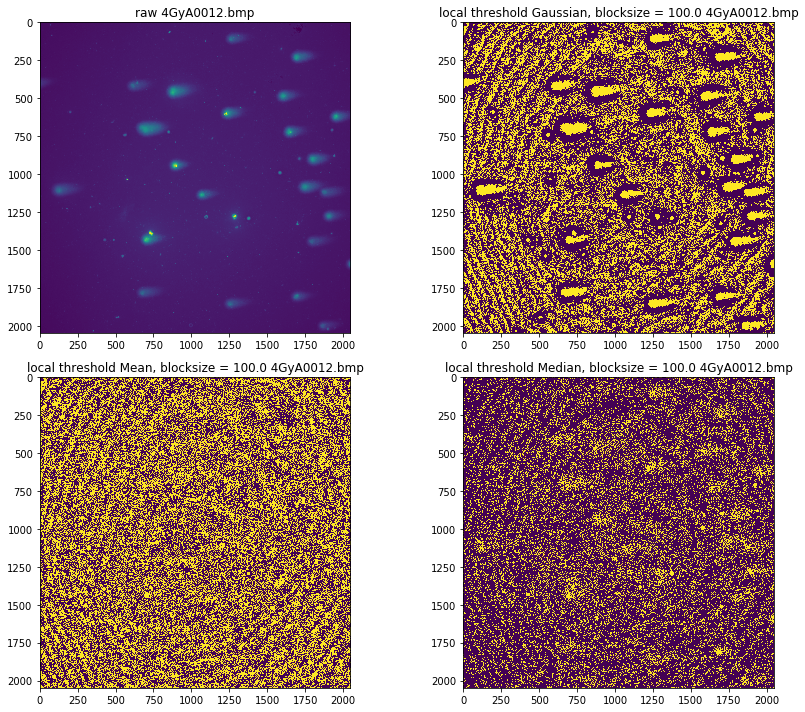

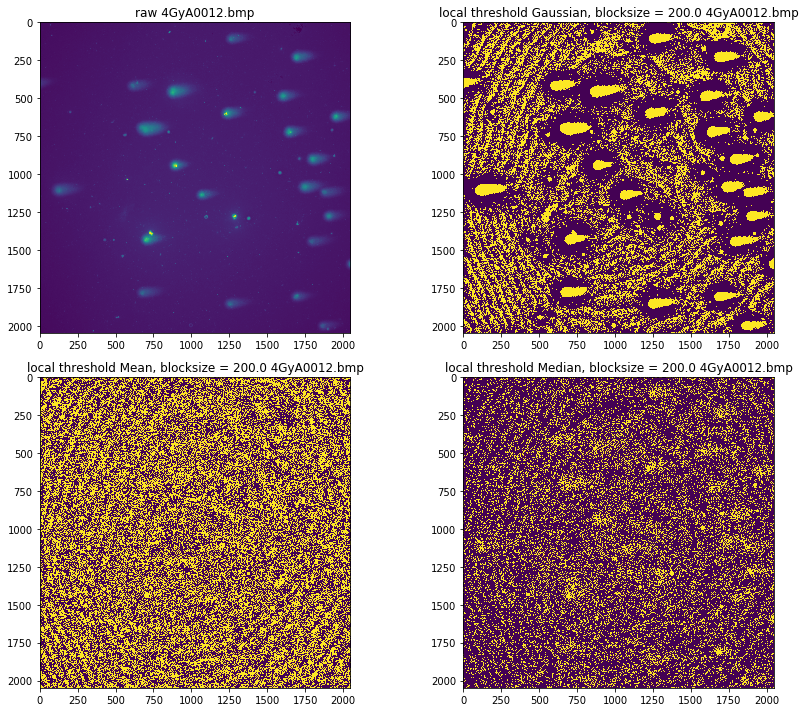

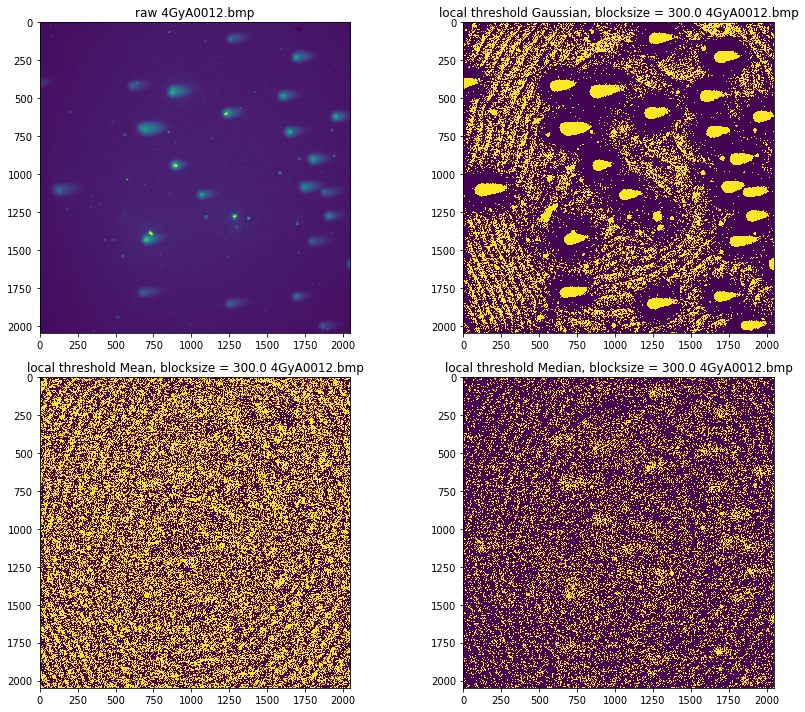

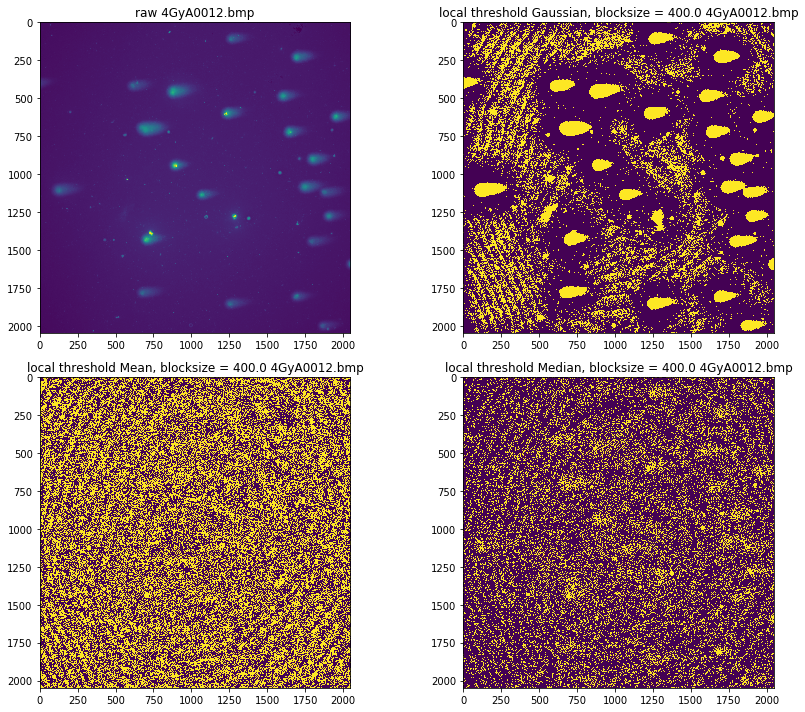

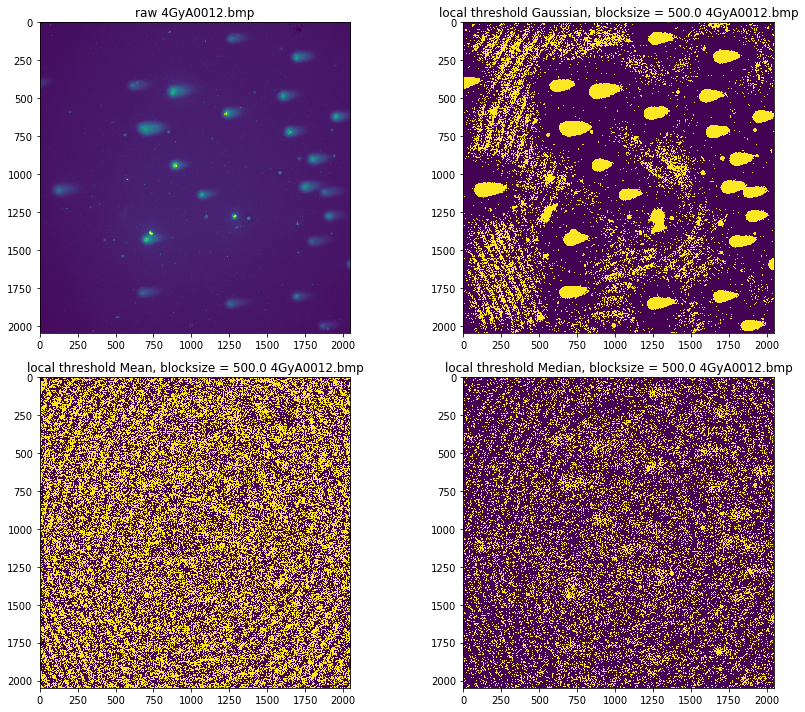

 
Date and time 2021-10-22 14:00:43.090195
Time since last check is 0:00:45.015716


In [3]:
import scipy.ndimage as scimg
from skimage.filters import threshold_triangle, threshold_local
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import sys
import cv2
import glob
import os
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import threshold_triangle, threshold_local
import matplotlib.pyplot as plt
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "Images\\ControlBatch\\0001.bmp"
imFile = "../CometImages/CA210609/Collated/4GyA/bmp/4GyA0012.bmp"
fileName = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]
print(fileName)
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgRaw[:, :]
#
# apply local threshold to imgArr
blocksize = np.linspace(100, 500, 5)
print("blocksize is: ", blocksize)
nBlock = len(blocksize)

for n in range (0, nBlock):
    threshLocalG = threshold_local(imgArr, block_size  = blocksize[n] +1, method = 'gaussian') #gaussian method
    imgLocalG = imgArr > threshLocalG
    #
    threshLocalMean = threshold_local(imgArr, block_size  = 10 +1, method = 'mean') #mean method
    imgLocalMean = imgArr > threshLocalMean
    #
    threshLocalMedian = threshold_local(imgArr, block_size  = 10 +1, method = 'median') #median method
    imgLocalMedian = imgArr > threshLocalMedian
    #
    #plot raw and thresholded images
    fig = plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.title("raw " + fileName)
    plt.imshow(imgArr)
    #
    plt.subplot(2, 2, 2)
    plt.title("local threshold Gaussian, blocksize = " + str(blocksize[n]) + " " + fileName)
    plt.imshow(imgLocalG)
    #
    plt.subplot(2, 2, 3)
    plt.title("local threshold Mean, blocksize = " + str(blocksize[n]) + " " + fileName)
    plt.imshow(imgLocalMean)
    #
    plt.subplot(2, 2, 4)
    plt.title("local threshold Median, blocksize = " + str(blocksize[n]) + " " + fileName)
    plt.imshow(imgLocalMedian)
    #
    plt.tight_layout()
    plt.show()
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Taking the adaptive thresholded image (Gaussian method) and applying the watershed method to see the cluster annotation output.
## Edited thresholding section to apply the local threshold Gaussian method.
## Code below copied from 210402LoopedRGBcometAnalysis

In [1]:
# SET DIRECTORY OF IMAGES TO ANALYSE
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import glob
import os
import sys
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
%matplotlib inline

#################################################
# Read in bmp files in directory
#
#real_test_dir = '../../datasets/comet/test/*.bmp'  #where the test directory is comapred to this notebook location
image_dir = '../CometImages/CA210609/Collated/4GyA/bmp/test/*.bmp'  #where the image directory is - find all bmp files here
#image_dir = '../CometImages/bulk-set/281015/HeLa59MeV0min/test/*.bmp'  #where the image directory is - find all bmp files here
fileList= sorted(glob.glob(image_dir))  #whole file path, as set in above line
#print("Files read in (whole path) are", fileList)
#
fileNames = [os.path.basename(x) for x in sorted(glob.glob(image_dir))]  #only file name with extension
print("\nFile names (with extension) are:", fileNames)
#
nFiles = len(fileNames)
print("\n",nFiles, " files will be analysed")
#
fileNamesSplit = np.empty((nFiles), dtype = 'object')
for n in range (0, nFiles):
    x = fileNames[n]
    fileNamesSplit[n] = os.path.splitext(x)[0]   #remove extension from file name
##
fileNameArray = np.empty((nFiles), dtype = 'object') #initialise empty 2d array to fill with strings for file name and type
for n in range (0, nFiles):
    fileNameArray[n] = fileNamesSplit[n]
print("\nfileNameArray is: ", fileNameArray)   #without extension
#
all_comets = {}
noComets = ['files not producing any annotations']

#Whether or not we want to write to JSON file
write = False
savePlots = False   #whether we want to save annotated images 
reduced_annotations = False

#by what factor to reduce comet annotations
reduction = 20

#files and directories to be written to
out_file_name = '../JSON/8GyBsecondauto-exp5.json'
#'JSON/RGB-train-thr10exp5.json'
#out_file_name = 'JSON/RGB-exp-val' +str(reduction)+ '.json'
if write == True:
    print("\noutput json file is: ", out_file_name) 
else:
    print("\nnot writing annoations to JSON file")

    #save_dir_plots = 'RGB-exp-val' + str(reduction)+ '/'
save_dir_plots = '../annotated-images/8GyBsecondauto-exp5/' 
if savePlots == True: 
    print("\ndirectory plots saved in is: ", save_dir_plots)
else: 
    print("\nnot saving annotation plots to file")

#########################################


Date and time  2021-10-22 12:07:08.903853

File names (with extension) are: ['4GyA0024.bmp']

 1  files will be analysed

fileNameArray is:  ['4GyA0024']

not writing annoations to JSON file

not saving annotation plots to file


Date and time  2021-10-22 12:07:30.674117
 
Cluster ID using Watershed algorithm
Cluster threshold 30, head threshold 80.
Min number of pixels in cluster 1000, max number 20000.
Min number of pixels in head 50, max number 10000.
shape of colDotsClus is:  (2048, 2048)
 


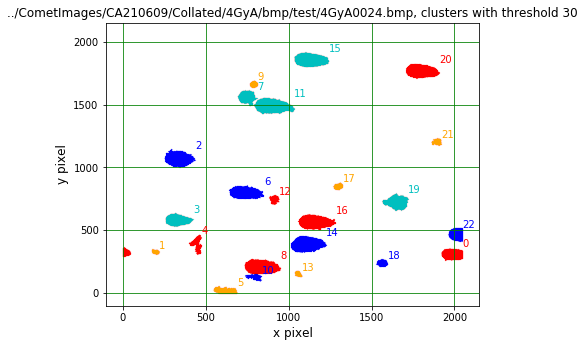

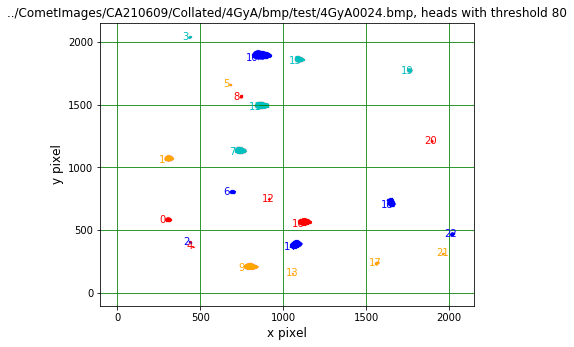

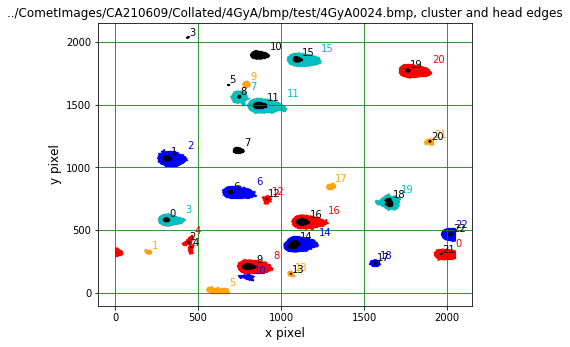

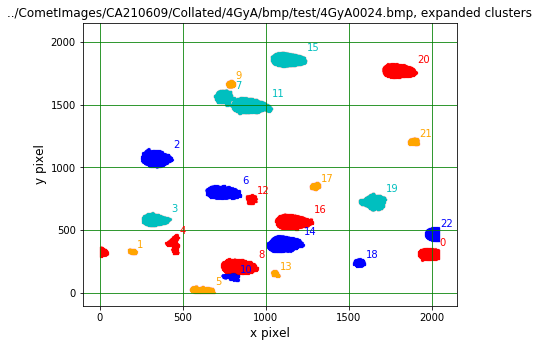

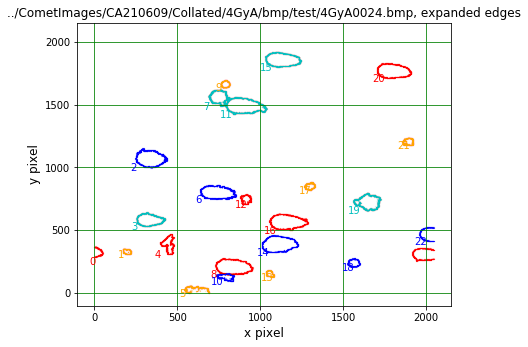

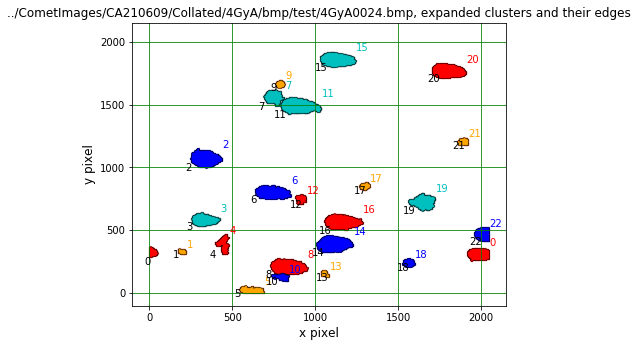

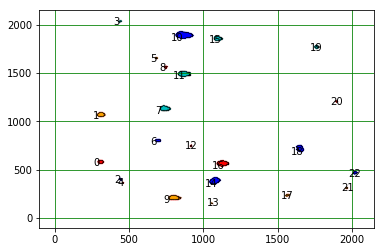

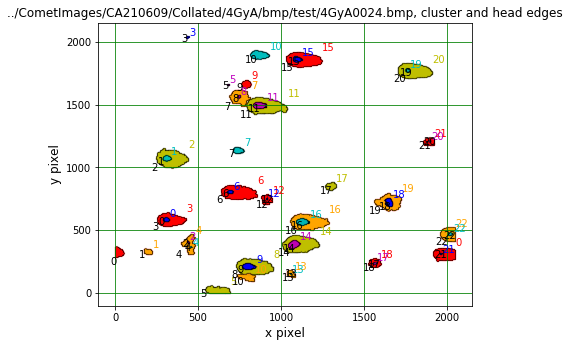

 
Image size 2048 x 2048
Fiducial region, rows 5 to 2043 , columns 5 to 2043
Min number of points in wheel 1000 , in rim 10
Rim size, row width 20 to 200 , column width 50 to 500
Max ratio of rim size to wheel area 0.1

too many heads in comet.

this rim has  204  points

too many heads in comet.

this rim has  580  points

too many heads in comet.

this rim has  236  points

too many heads in comet.

this rim has  370  points

too many heads in comet.

this rim has  266  points
 


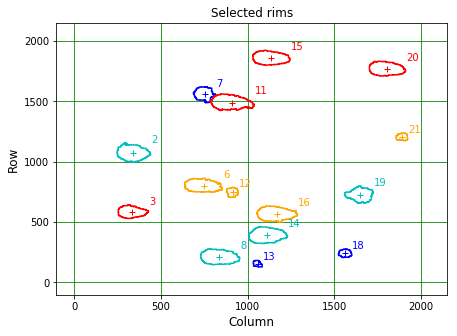

number of comets rejected due > 1 head is:  5
col_sorted shape:  (23, 839)
 
Number of polygons (nRimOut) 15
 


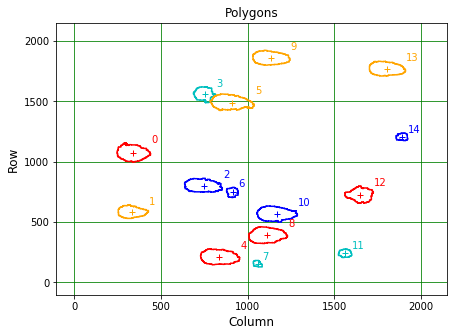

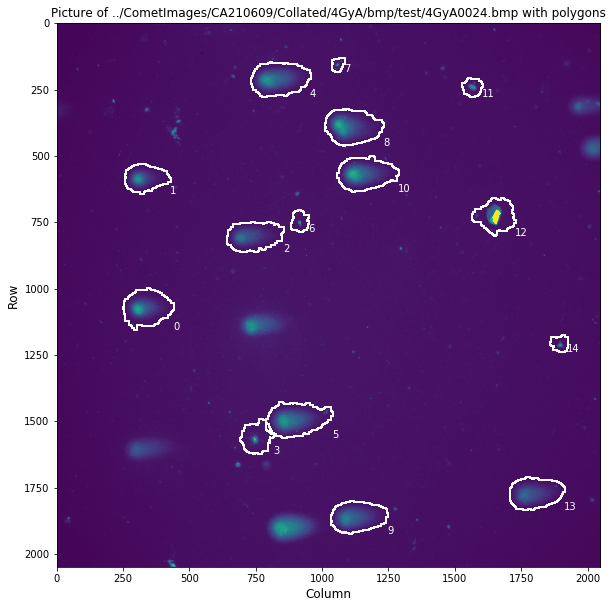

Data has not been written to file.
 
im_file_size 4195382
dict_name 4GyA0024.bmp4195382
out_file_size 993489
 
Date and time 2021-10-22 12:11:39.515718
Time since last check is 0:04:08.841601


In [2]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import sys
import numpy as np
import scipy.ndimage as scimg
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
#import scipy.ndimage as scimg
from skimage.filters import threshold_triangle, threshold_local
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import os
import json
from jsonmerge import merge
import processing_defs as process
# 
################################################################################

# BEGIN LOOP  for analysis of all images in directory
## Initial image processing
#Open image, convert to grey scale and apply a range of increasing thresholds.
#
for iFile in range(0,nFiles):
    # Read in image
    imFile = fileList[iFile]
    imgRaw = plt.imread(imFile)
    #imgRaw = imgRaw / np.amax(imgRaw)  
    #
    # Number of rows and columns. Depth is 3 for RGB, 4 for RGBA image. A is opacity (alpha)
    shape = imgRaw.shape
    nRows = imgRaw.shape[0] 
    nCols = imgRaw.shape[1]
    if len(shape) == 3:
        nDepth = imgRaw.shape[2]
    else:
        nDepth = 1
    #
    # Determine image format and process accordingly
    if nDepth == 4:
        imgRGB = process.rgba2rgb(imgRaw)
        imgGrey = process.rgb2grey(imgRGB, 1)
    elif nDepth == 3:
        imgRGB = imgRaw
        imgGrey = process.rgb2grey(imgRGB, 1)
    elif nDepth == 1:
        imgRGB = imgRaw
        imgGrey = imgRaw
    else:
        print(" ")
        print("Unexpected image depth",nDepth)
        sys.stop()
    #
    maxPixRaw = np.amax(imgRaw)
    maxPixGrey = np.amax(imgGrey)
    maxPixRGB = np.amax(imgRGB)
    # Set thresholds for applying to image (lowest to highest)
    #thresh = np.array([10, 180]) 
    #
    thresh = np.array([30, 80]) #was [10, 80] or [30,150]
    #thresh = np.array([int(0.1*maxPixGrey), int(0.4*maxPixGrey)])
    blocksize = 2500
    imgThr = np.zeros((nRows, nCols, 2))
    threshLocalG = threshold_local(imgGrey, block_size  = blocksize+1, method = 'gaussian') #gaussian method
    imgThr[:, :, 0] = imgGrey > threshLocalG #comet finding threshold from adaptive gaussian method
    imgThr[: , :, 1] = imgGrey > thresh[1] #second threshold is set to lower threshold for finding heads
    
    nThresh = len(thresh)
    img = np.zeros((nRows, nCols))
    
#####################################################################
## Identify clusters using watershed algorithm
#Identify "clusters" at the lowest threshold and "heads" at the higher threshold.
#
    debug = False
    if debug:
        print("Running in debug mode!")
        clusPic = np.zeros((nRows, nCols))
    #
    # Requirements on minimum and maximum number of pixels in wheels at the cluster and head thresholds
    minClusPixels = 1000  #was 100
    maxClusPixels = 20000 #nRows*nCols/10
    minHeadPixels = 50
    maxHeadPixels = 10000  #nRows*nCols/10
    #
    print(" ")
    print("Cluster ID using Watershed algorithm")
    print("Cluster threshold",thresh[0],"\b, head threshold",thresh[1],"\b.")
    print("Min number of pixels in cluster",minClusPixels,"\b, max number",maxClusPixels,"\b.")
    print("Min number of pixels in head",minHeadPixels,"\b, max number",maxHeadPixels,"\b.")
    #
    # Define grid of markers and background marker value:
    nStepCols = 2
    nStepRows = 2
    rMark, cMark = np.ogrid[0:nRows:nStepRows, 0:nCols:nStepCols]
    if debug:
        print(" ")
        print("rMark.shape",rMark.shape,"cMark.shape",cMark.shape)
    mStart = 1
    markers = np.zeros((nRows, nCols)).astype(np.int)
    markers[rMark, cMark] = rMark/nStepRows + cMark*nRows/(nStepRows*nStepCols) + mStart
    if debug:
        plt.figure(figsize = (6.7, 5.2))
        plt.imshow(markers, cmap = "CMRmap");
    #
    # Create image with cluster threshold and run watershed algorithm
    #clusImg = imgGrey > thresh[0]
    clusImg = imgGrey > threshLocalG
    
    if debug:
        plt.figure(figsize = (6.7, 5.2))
        plt.imshow(clusImg);
    colDotsClus = ndimage.watershed_ift(clusImg.astype(np.uint8), markers)
    print("shape of colDotsClus is: ", colDotsClus.shape)
    #
    # Remove "isolated" markers (i.e. markers in regions where no cluster found)
    colDotsClus[rMark, cMark] = colDotsClus[rMark + 1, cMark]
    #
    # Find the value of the marker of the last identified regions
    mMaxClus = np.amax(colDotsClus)
    #
    # Positions of marker values
    boolClus = colDotsClus >= mStart
    nFoundClus = len(np.unique(colDotsClus[boolClus]))
    rMarkerClus = np.zeros(nFoundClus)
    rMarkerClus = np.unique(colDotsClus[boolClus])
    #
    # Select the clusters, first pass (determine accepted number). Must exclude tiny clusters (noise) and any 
    # really large clusters (background regions in image).
    nClus = 0
    cMarkerClus = np.zeros(nFoundClus)
    maxInDotClus = 0
    for nR in range(0, nFoundClus):
        boolClus = colDotsClus == rMarkerClus[nR]
        nHereCl = np.sum(boolClus)
        if nHereCl < minClusPixels or nHereCl > maxClusPixels:
            continue
        maxInDotClus = max(maxInDotClus, nHereCl)
        cMarkerClus[nClus] = rMarkerClus[nR]
        nClus += 1
    #
    # Create image with head threshold and run watershed algorithm
    headImg = imgGrey > thresh[1]
    if debug:
        plt.figure(figsize = (6.7, 5.2))
        plt.imshow(headImg);
    colDotsHead = ndimage.watershed_ift(headImg.astype(np.uint8), markers)
    #
    # Remove "isolated" markers
    colDotsHead[rMark, cMark] = colDotsHead[rMark + 1, cMark]
    #
    # Find the value of the marker of the last identified regions.
    mMaxHead = np.amax(colDotsHead)
    #
    # Positions of marker values that are not background
    boolHead = colDotsHead > mStart
    nFoundHead = len(np.unique(colDotsHead[boolHead]))
    rMarkerHead = np.zeros(nFoundHead)
    rMarkerHead = np.unique(colDotsHead[boolHead])
    #
    # Select the heads, first pass (determine accepted number). Must exclude tiny clusters (noise) and any 
    # really large clusters (background regions in image).
    nHead = 0
    cMarkerHead = np.zeros(nFoundHead)
    maxInDotHead = 0
    for nR in range(0, nFoundHead):
        boolHead = colDotsHead == rMarkerHead[nR]
        nHereHd = np.sum(boolHead)
        if nHereHd < minHeadPixels or nHereHd > maxHeadPixels:
            continue
        maxInDotHead = max(maxInDotHead, nHereHd) 
        cMarkerHead[nHead] = rMarkerHead[nR]
        nHead += 1
    #
    # Colour table for plots
    nColTab = 4
    colorTab = ['r', 'orange', 'b', 'c']
    #
    # Information on clusters
    nInCluster = np.zeros(nClus).astype(int)
    iClusSum = np.zeros(nClus)
    #
    # Information on pixels in clusters
    lClus = np.sum(clusImg)
    #
    # Safe size of arrays would be number of pixels in image. Try to reduce size by using number of pixels in clusters
    # The factor lFact can be used to expand array sizes
    lFact = 4
    #lFact = 20
    indexCl = np.zeros(lFact*lClus)
    cPixelsCl = np.zeros(lFact*lClus).astype(int)
    rPixelsCl = np.zeros(lFact*lClus).astype(int)
    iPixelsCl = np.zeros(lFact*lClus)
    #
    # Information on head
    nInHead = np.zeros(nHead).astype(int)
    iHeadSum = np.zeros(nHead)
    #
    # Information on pixels in head (lHead must be large enough...here probably larger than usually needed)
    lHead = lClus
    lFact = 20
    indexHd = np.zeros(lFact*lHead)
    cPixelsHd = np.zeros(lFact*lHead).astype(int)
    rPixelsHd = np.zeros(lFact*lHead).astype(int)
    iPixelsHd = np.zeros(lFact*lHead)
    #
    # Temporary information 
    cPixelsHere = np.zeros(lClus).astype(int)
    rPixelsHere = np.zeros(lClus).astype(int)
    iPixelsHere = np.zeros(lClus)
    thisPic = np.zeros((nRows, nCols))
    #
    # Find pixels in clusters, determine positions and plot 
    fig = plt.figure(figsize=(6.7, 5.2))
    ax = fig.add_subplot(1, 1, 1)
    plt.title(imFile + ", clusters with threshold " + str(thresh[0]), fontsize = 12)
    plt.xlabel('x pixel', fontsize = 12)
    plt.ylabel('y pixel', fontsize = 12)
    #
    # Figure control
    xOffMax = 2
    yOffMax = 2
    mSize = 0.001
    #
    nCol = 0
    nLastCl = 0
    for nC in range(0, nClus):
        #
        # Clusters
        boolClus = colDotsClus == cMarkerClus[nC]
        nHereCl = np.sum(boolClus).astype(int)
        #
        nInCluster[nC] = nHereCl
        #
        # Indices of x and y pixels
        rPixelsHere, cPixelsHere = np.where(boolClus)
        thisPic.fill(0) 
        thisPic[rPixelsHere, cPixelsHere] = 1
        if debug:
            clusPic += thisPic
        #
        # Intensities in pixels
        iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
        iClusSum[nC] = np.sum(iPixelsHere)
        #
        indexCl[nLastCl:nLastCl + nHereCl] = nC*np.ones(nHereCl)
        cPixelsCl[nLastCl:nLastCl + nHereCl] = cPixelsHere[:]
        rPixelsCl[nLastCl:nLastCl + nHereCl] = rPixelsHere[:]
        iPixelsCl[nLastCl:nLastCl + nHereCl] = iPixelsHere[:]
        #
        plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = colorTab[nCol], marker = 'o')
        rLab = np.amax(rPixelsHere[0:nHereCl]) + yOffMax
        cLab = np.amax(cPixelsHere[0:nHereCl]) + xOffMax
        plt.text(cLab, rLab, str(nC), color = colorTab[nCol])
        nCol = nCol + 1
        if nCol > nColTab - 1:
             nCol = 0
        #
        nLastCl = nLastCl + nHereCl
        #
    #
    plt.xlim(-0.05*nCols, 1.05*nCols)
    plt.ylim(-0.05*nRows, 1.05*nRows)
    plt.grid(color = 'g')
    print(" ")
    plt.show()
    #
    # Find pixels in head, determine positions and plot
    fig = plt.figure(figsize=(6.7, 5.2))
    ax = fig.add_subplot(1, 1, 1)
    plt.title(imFile + ", heads with threshold " + str(thresh[1]), fontsize = 12)
    plt.xlabel('x pixel', fontsize = 12)
    plt.ylabel('y pixel', fontsize = 12)
    #
    # Figure control
    xOffMin = 15.0
    yOffMin = 35.0
    mSize = 0.001
    #
    nCol = 0
    nLastHd = 0
    for nH in range(0, nHead):
        boolHead = colDotsHead == cMarkerHead[nH]
        nHereHd = np.sum(boolHead).astype(int)
        #
        nInHead[nH] = nHereHd
        #
        # Indices of x and y pixels
        rPixelsHere, cPixelsHere = np.where(boolHead)
        #
        # Intensities in pixels
        iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
        iHeadSum[nH] = np.sum(iPixelsHere)
        #
        indexHd[nLastHd:nLastHd + nHereHd] = nC*np.ones(nInHead[nH])
        cPixelsHd[nLastHd:nLastHd + nHereHd] = cPixelsHere[0:nHereHd]
        rPixelsHd[nLastHd:nLastHd + nHereHd] = rPixelsHere[0:nHereHd]
        iPixelsHd[nLastHd:nLastHd + nHereHd] = iPixelsHere[0:nHereHd]
        #
        plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = colorTab[nCol], marker = 'o')
        rLab = np.amin(rPixelsHere) - xOffMin
        cLab = np.amin(cPixelsHere) - yOffMin
        plt.text(cLab, rLab, str(nH), color = colorTab[nCol])
        nCol = nCol + 1
        if nCol > nColTab - 1:
             nCol = 0
        #
        nLastHd = nLastHd + nHereHd
    #
    plt.xlim(-0.05*nCols, 1.05*nCols)
    plt.ylim(-0.05*nRows, 1.05*nRows)
    plt.grid(color = 'g')
    print(" ")
    plt.show()
###########################################################################    
## Make plots using stored cluster and head data
    #
    fig = plt.figure(figsize=(6.7, 5.2))
    ax = fig.add_subplot(1, 1, 1)
    plt.title(imFile + ", cluster and head edges", fontsize = 12)
    plt.xlabel('x pixel', fontsize = 12)
    plt.ylabel('y pixel', fontsize = 12)
    #
    nCol = 0
    #
    nLastCl = 0
    nLastClEd = 0
    for nC in range(0, nClus):
        #
        # Clusters
        nHereCl = nInCluster[nC]
        plt.scatter(cPixelsCl[nLastCl:nLastCl + nHereCl], rPixelsCl[nLastCl:nLastCl + nHereCl], 
                    s = mSize, c = colorTab[nCol], marker = 'o')
        rLab = np.amax(rPixelsCl[nLastCl:nLastCl + nHereCl]) + yOffMax
        cLab = np.amax(cPixelsCl[nLastCl:nLastCl + nHereCl]) + xOffMax
        plt.text(cLab, rLab, str(nC), color = colorTab[nCol])
        nCol = nCol + 1
        if nCol > nColTab - 1:
             nCol = 0
        #
        nLastCl = nLastCl + nHereCl
        #
    #
    nCol = 0
    nLastHd = 0
    for nH in range(0, nHead):
        #
        # Heads
        nHereHd = nInHead[nH]
        plt.scatter(cPixelsHd[nLastHd:nLastHd + nHereHd], rPixelsHd[nLastHd:nLastHd + nHereHd], 
                    s = mSize, c = 'k', marker = 'o')
        rLab = np.amax(rPixelsHd[nLastHd:nLastHd + nHereHd]) + yOffMax
        cLab = np.amax(cPixelsHd[nLastHd:nLastHd + nHereHd]) + xOffMax
        plt.text(cLab, rLab, str(nH), color = 'k')
        #
        nLastHd = nLastHd + nHereHd
    #
    plt.xlim(-0.05*nCols, 1.05*nCols)
    plt.ylim(-0.05*nRows, 1.05*nRows)
    plt.grid(color = 'g')
    print(" ")
    plt.show()

#######################################################################
#Expand clusters and plot
    useDiag = True
    #
    # Temporary information 
    lFact = 1
    cPixelsHere = np.zeros(lFact*lClus).astype(int)
    rPixelsHere = np.zeros(lFact*lClus).astype(int)
    thisPicEx = np.zeros((nRows, nCols))
    thisEdge = np.zeros((nRows, nCols))
    #
    # Information on expanded cluster
    nInClusEx = np.zeros(nClus).astype(int)
    iClusExSum = np.zeros(nClus)
    #
    # Information on pixels in expanded cluster
    lFact = 30
    indexClEx = np.zeros(lFact*lClus)
    cPixelsClEx = np.zeros(lFact*lClus).astype(int)
    rPixelsClEx = np.zeros(lFact*lClus).astype(int)
    iPixelsClEx = np.zeros(lFact*lClus)
    #
    # Information on edge
    nInEdge = np.zeros(nClus).astype(int)
    iEdgeSum = np.zeros(nClus)
    #
    # Information on pixels in expanded edge
    lFact = 3
    indexEdge = np.zeros(lFact*lClus)
    cPixelsEdge = np.zeros(lFact*lClus).astype(int)
    rPixelsEdge = np.zeros(lFact*lClus).astype(int)
    iPixelsEdge = np.zeros(lFact*lClus)
    #
    # Pictures before and after expanding and edges (all clusters)
    clusPic = np.zeros((nRows, nCols))
    clusPicEx = np.zeros((nRows, nCols))
    edgePic = np.zeros((nRows, nCols))
    #
    # Expansion required
    widthEx = 5  #was 10  (5 also used)
    #
    fig = plt.figure(figsize=(6.7, 5.2))
    ax = fig.add_subplot(1, 1, 1)
    plt.title(imFile + ", expanded clusters", fontsize = 12)
    plt.xlabel('x pixel', fontsize = 12)
    plt.ylabel('y pixel', fontsize = 12)
    #
    # Figure control
    xOffMax = 2
    yOffMax = 2
    xOffMin = 30
    yOffMin = 30
    mSize = 0.001
    #
    nLastCl = 0
    nLastClEx = 0
    nLastEdge = 0
    nCol = 0
    for nC in range(0, nClus):
        #
        # Clusters
        nHereCl = nInCluster[nC]
        #
        # Indices of x and y pixels
        thisPic.fill(0) 
        thisPic[rPixelsCl[nLastCl:nLastCl + nHereCl], cPixelsCl[nLastCl:nLastCl + nHereCl]] = 1
        clusPic += thisPic
        #
        nLastCl = nLastCl + nHereCl
        #
        # Expand cluster
        thisExp, thisEdge = process.expander(thisPic, widthEx, useDiag)
        nHereClEx = np.sum(thisExp).astype(int)
        nInClusEx[nC] = nHereClEx
        #
        # Indices of x and y pixels expanded cluster
        rPixelsHereEx, cPixelsHereEx = np.where(thisExp)
        thisPicEx.fill(0)
        thisPicEx[rPixelsHereEx, cPixelsHereEx] = 1
        clusPicEx += thisPicEx
        #
        # Intensities in pixels expanded cluster
        iPixelsHereEx = imgGrey[rPixelsHereEx, cPixelsHereEx]
        iClusExSum[nC] = np.sum(iPixelsHereEx)
        #
        indexClEx[nLastClEx:nLastClEx + nHereClEx] = nC*np.ones(nHereClEx)
        cPixelsClEx[nLastClEx:nLastClEx + nHereClEx] = cPixelsHereEx[:]
        rPixelsClEx[nLastClEx:nLastClEx + nHereClEx] = rPixelsHereEx[:]
        iPixelsClEx[nLastClEx:nLastClEx + nHereClEx] = iPixelsHereEx[:]
        #
        plt.scatter(cPixelsClEx[nLastClEx:nLastClEx + nHereClEx], rPixelsClEx[nLastClEx:nLastClEx + nHereClEx], 
                    s = mSize, c = colorTab[nCol], marker = 'o')
        rLab = np.amax(rPixelsClEx[nLastClEx:nLastClEx + nHereClEx]) + yOffMax
        cLab = np.amax(cPixelsClEx[nLastClEx:nLastClEx + nHereClEx]) + xOffMax
        plt.text(cLab, rLab, str(nC), color = colorTab[nCol])
        nCol = nCol + 1
        if nCol > nColTab - 1:
             nCol = 0
        #
        nLastClEx = nLastClEx + nHereClEx
        #
        # Expanded edges
        nHereEdge = np.sum(thisEdge).astype(int)
        nInEdge[nC] = nHereEdge
        #
        # Indices of x and y pixels edge
        rPixelsHereEdge, cPixelsHereEdge = np.where(thisEdge)
        thisEdge.fill(0)
        thisEdge[rPixelsHereEdge, cPixelsHereEdge] = 1
        edgePic += thisEdge
        #
        # Intensities in pixels edge
        iPixelsHereEdge = imgGrey[rPixelsHereEdge, cPixelsHereEdge]
        iEdgeSum[nC] = np.sum(iPixelsHereEdge)
        #
        indexEdge[nLastEdge:nLastEdge + nHereEdge] = nC*np.ones(nHereEdge)
        cPixelsEdge[nLastEdge:nLastEdge + nHereEdge] = cPixelsHereEdge[:]
        rPixelsEdge[nLastEdge:nLastEdge + nHereEdge] = rPixelsHereEdge[:]
        iPixelsEdge[nLastEdge:nLastEdge + nHereEdge] = iPixelsHereEdge[:]
        nLastEdge = nLastEdge + nHereEdge
        #
    plt.xlim(-0.05*nCols, 1.05*nCols)
    plt.ylim(-0.05*nRows, 1.05*nRows)
    plt.grid(color = 'g')
    print(" ")
    plt.show()
    #
    if debug:
        print(" ")
        plt.figure(figsize = (6.7, 5.2))
        plt.imshow(clusPic);
        plt.show()
        print(" ")
        plt.figure(figsize = (6.7, 5.2))
        plt.imshow(clusPicEx);
        plt.show()
        print(" ")
        plt.figure(figsize = (6.7, 5.2))
        plt.imshow(edgePic);
        plt.show()
#
###################################################################################
#Plot expanded edges
#
    fig = plt.figure(figsize=(6.7, 5.2))
    ax = fig.add_subplot(1, 1, 1)
    plt.title(imFile + ", expanded edges", fontsize = 12)
    plt.xlabel('x pixel', fontsize = 12)
    plt.ylabel('y pixel', fontsize = 12)
    #
    # Figure control
    xOffMax = 2
    yOffMax = 2
    xOffMin = 30
    yOffMin = 30
    mSize = 0.001
    #
    nLastEdge = 0
    nCol = 0
    for nC in range(0, nClus):
        #
        # Edges
        nHereEdge = nInEdge[nC]
        #
        plt.scatter(cPixelsEdge[nLastEdge:nLastEdge + nHereEdge], rPixelsEdge[nLastEdge:nLastEdge + nHereEdge], 
                    s = mSize, c = colorTab[nCol], marker = 'o')
        rLab = np.amin(rPixelsEdge[nLastEdge:nLastEdge + nHereEdge]) - yOffMin
        cLab = np.amin(cPixelsEdge[nLastEdge:nLastEdge + nHereEdge]) - xOffMin
        plt.text(cLab, rLab, str(nC), color = colorTab[nCol])
        nCol = nCol + 1
        if nCol > nColTab - 1:
             nCol = 0
        #
        nLastEdge = nLastEdge + nHereEdge
        #
    plt.xlim(-0.05*nCols, 1.05*nCols)
    plt.ylim(-0.05*nRows, 1.05*nRows)
    plt.grid(color = 'g')
    print(" ")
    plt.show()
##############################################################################
#Find edges of expanded clusters and plot
#
    clusPic = np.zeros((nRows, nCols))
    headPic = np.zeros((nRows, nCols))
    #
    # Information on cluster edge
    nInClusEd = np.zeros(nClus).astype(int)
    iClusEdSum = np.zeros(nClus)
    #
    # Information on pixels in cluster edge
    lFact = 1
    indexClEd = np.zeros(lFact*lClus)
    cPixelsClEd = np.zeros(lFact*lClus)
    rPixelsClEd = np.zeros(lFact*lClus)
    iPixelsClEd = np.zeros(lFact*lClus)
    #
    # Pictures for display/edge finding
    thisEdge = np.zeros((nRows, nCols))
    thisEdgePic = np.zeros((nRows, nCols))
    #
    # Edge width required
    width = 1
    #
    fig = plt.figure(figsize=(6.7, 5.2))
    ax = fig.add_subplot(1, 1, 1)
    plt.title(imFile + ", expanded clusters and their edges", fontsize = 12)
    plt.xlabel('x pixel', fontsize = 12)
    plt.ylabel('y pixel', fontsize = 12)
    #
    # Figure control
    xOffMax = 2
    yOffMax = 2
    xOffMin = 30
    yOffMin = 30
    nCol = 0
    mSize = 0.001
    #
    nLastClEx = 0
    nLastClEd = 0
    for nC in range(0, nClus):
        #
        # Clusters
        nHereClEx = nInClusEx[nC]
        #
        # Indices of x and y pixels
        thisPic.fill(0)
        thisPic[rPixelsClEx[nLastClEx:nLastClEx + nHereClEx], cPixelsClEx[nLastClEx:nLastClEx + nHereClEx]] = 1
        clusPic += thisPic
        #
        plt.scatter(cPixelsClEx[nLastClEx:nLastClEx + nHereClEx], rPixelsClEx[nLastClEx:nLastClEx + nHereClEx],
                    s = mSize, c = colorTab[nCol], marker = 'o')
        rLab = np.amax(rPixelsClEx[nLastClEx:nLastClEx + nHereClEx]) + yOffMax
        cLab = np.amax(cPixelsClEx[nLastClEx:nLastClEx + nHereClEx]) + xOffMax
        plt.text(cLab, rLab, str(nC), color = colorTab[nCol])
        #
        nCol = nCol + 1
        if nCol > nColTab - 1:
             nCol = 0
        #
        nLastClEx = nLastClEx + nHereClEx
        #
        # Edges
        thisEdge = process.edgeFinderIn(thisPic, width, useDiag)
        nHereClEd = np.sum(thisEdge).astype(int)
        #
        nInClusEd[nC] = nHereClEd
        #
        # Indices of x and y pixels
        rPixelsHereEd, cPixelsHereEd = np.where(thisEdge)
        thisEdgePic[rPixelsHereEd, cPixelsHereEd] = 1
        #
        # Intensities in pixels
        iPixelsHereEd = imgGrey[rPixelsHereEd, cPixelsHereEd]
        iClusEdSum[nC] = np.sum(iPixelsHereEd)
        #
        indexClEd[nLastClEd:nLastClEd + nHereClEd] = nC*np.ones(nInClusEd[nC])
        cPixelsClEd[nLastClEd:nLastClEd + nHereClEd] = cPixelsHereEd[0:nHereClEd]
        rPixelsClEd[nLastClEd:nLastClEd + nHereClEd] = rPixelsHereEd[0:nHereClEd]
        iPixelsClEd[nLastClEd:nLastClEd + nHereClEd] = iPixelsHereEd[0:nHereClEd]
        #
        plt.scatter(cPixelsHereEd, rPixelsHereEd, s = mSize, c = 'k', marker = 'o')
        rLab = np.amin(rPixelsHereEd[0:nHereClEd]) - yOffMin
        cLab = np.amin(cPixelsHereEd[0:nHereClEd]) - xOffMin
        plt.text(cLab, rLab, str(nC), color = 'k')
        #
        nLastClEd = nLastClEd + nHereClEd
        #
    plt.xlim(-0.05*nCols, 1.05*nCols)
    plt.ylim(-0.05*nRows, 1.05*nRows)
    plt.grid(color = 'g')
    print(" ")
    plt.show()
    #
    if debug:
        print(" ")
        plt.figure(figsize = (6.7, 5.2))
        plt.imshow(clusPic);
        plt.show()
    #
############################################################################################
#Make image of heads, find their edges and plot
      #
    # Figure control
    xOffMax = 2
    yOffMax = 2
    xOffMin = 30
    yOffMin = 30
    nCol = 0
    mSize = 0.001
    #
    # Information on head edge
    width = 1
    nInHeadEd = np.zeros(nHead).astype(int)
    iHeadEdSum = np.zeros(nHead)
    #
    # Information on pixels in head edge
    indexHdEd = np.zeros(lHead)
    cPixelsHdEd = np.zeros(lHead).astype(int)
    rPixelsHdEd = np.zeros(lHead).astype(int)
    iPixelsHdEd = np.zeros(lHead)
    #
    # Pictures for display/edge finding
    headPic = np.zeros((nRows, nCols))
    #
    nLastHd = 0
    nLastHdEd = 0
    for nH in range(0, nHead):
        #
        # Heads
        nHereHd = nInHead[nH]
        thisPic.fill(0)
        thisPic[rPixelsHd[nLastHd:nLastHd + nHereHd], cPixelsHd[nLastHd:nLastHd + nHereHd]] = 1
        headPic += thisPic
        #
        plt.scatter(cPixelsHd[nLastHd:nLastHd + nHereHd], rPixelsHd[nLastHd:nLastHd + nHereHd], 
                    s = mSize, c = colorTab[nCol], marker = 'o')
        rLab = np.amax(rPixelsHd[nLastHd:nLastHd + nHereHd]) + yOffMax
        cLab = np.amax(cPixelsHd[nLastHd:nLastHd + nHereHd]) + xOffMax
        nCol += 1
        if nCol > nColTab - 1:
             nCol = 0
        #
        nLastHd = nLastHd + nHereHd
        #
        # Edges
        thisEdge = process.edgeFinderIn(thisPic, width, useDiag)
        nHereHdEd = np.sum(thisEdge).astype(int)
        #
        nInHeadEd[nH] = nHereHdEd
        #
        # Indices of x and y pixels
        thisEdgePic.fill(0)
        rPixelsHereEd, cPixelsHereEd = np.where(thisEdge)
        thisEdgePic[rPixelsHereEd, cPixelsHereEd] = 1
        #
        # Intensities in pixels
        iPixelsHereEd = imgGrey[rPixelsHereEd, cPixelsHereEd]
        iHeadEdSum[nH] = np.sum(iPixelsHereEd)
        #
        indexHdEd[nLastHdEd:nLastHdEd + nHereHdEd] = nH*np.ones(nInHeadEd[nH])
        cPixelsHdEd[nLastHdEd:nLastHdEd + nHereHdEd] = cPixelsHereEd[:]
        rPixelsHdEd[nLastHdEd:nLastHdEd + nHereHdEd] = rPixelsHereEd[:]
        iPixelsHdEd[nLastHdEd:nLastHdEd + nHereHdEd] = iPixelsHereEd[:]
        #
        plt.scatter(cPixelsHereEd, rPixelsHereEd, s = mSize, c = 'k', marker = 'o')
        rLab = np.amin(rPixelsHereEd) - yOffMin
        cLab = np.amin(cPixelsHereEd) - xOffMin
        plt.text(cLab, rLab, str(nH), color = 'k')
        #
        nLastHdEd = nLastHdEd + nHereHdEd
        #
    plt.xlim(-0.05*nCols, 1.05*nCols)
    plt.ylim(-0.05*nRows, 1.05*nRows)
    plt.grid(color = 'g')
    print(" ")
    plt.show()
    #
    if debug:
        print(" ")
        plt.figure(figsize = (6.7, 5.2))
        plt.imshow(headPic);
        plt.show()
    #
###################################################################
#Plot expanded clusters and heads together
#Note that the index of a head and its associated cluster may be different!
#
    # Figure control
    xOffMax = 2
    yOffMax = 2
    xOffMin = 30
    yOffMin = 30
    mSize = 0.001
    #
    # Colour tables for plots
    nColTab1 = 3
    colorTab1 = ['r', 'orange', 'y']
    #
    nColTab2 = 3
    colorTab2 = ['b', 'c', 'm']
    #
    fig = plt.figure(figsize=(6.7, 5.2))
    ax = fig.add_subplot(1, 1, 1)
    plt.title(imFile + ", cluster and head edges", fontsize = 12)
    plt.xlabel('x pixel', fontsize = 12)
    plt.ylabel('y pixel', fontsize = 12)
    #
    nLastClEx = 0
    nLastClEd = 0
    nCol1 = 0
    for nC in range(0, nClus):
        #
        # Clusters
        nHereClEx = nInClusEx[nC]
        plt.scatter(cPixelsClEx[nLastClEx:nLastClEx + nHereClEx], rPixelsClEx[nLastClEx:nLastClEx + nHereClEx],
                    s = mSize, c = colorTab1[nCol1], marker = 'o')
        rLab = np.amax(rPixelsClEx[nLastClEx:nLastClEx + nHereClEx]) + yOffMax
        cLab = np.amax(cPixelsClEx[nLastClEx:nLastClEx + nHereClEx]) + xOffMax
        plt.text(cLab, rLab, str(nC), color = colorTab1[nCol1])
        #
        nCol1 += 1
        if nCol1 > nColTab1 - 1:
             nCol1 = 0
        #
        nLastClEx = nLastClEx + nHereClEx
        #
        # Edges
        nHereClEd = nInClusEd[nC]
        plt.scatter(cPixelsClEd[nLastClEd:nLastClEd + nHereClEd], rPixelsClEd[nLastClEd:nLastClEd + nHereClEd],
                    s = mSize, c = 'k', marker = 'o')
        rLab = np.amin(rPixelsClEd[nLastClEd:nLastClEd + nHereClEd]) - yOffMin
        cLab = np.amin(cPixelsClEd[nLastClEd:nLastClEd + nHereClEd]) - xOffMin
        plt.text(cLab, rLab, str(nC), color = 'k')
        #
        nLastClEd = nLastClEd + nHereClEd
        #
    nCol2 = 0
    #
    nLastHd = 0
    nLastHdEd = 0
    for nH in range(0, nHead):
        #
        # Heads
        nHereHd = nInHead[nH]
        plt.scatter(cPixelsHd[nLastHd:nLastHd + nHereHd], rPixelsHd[nLastHd:nLastHd + nHereHd], 
                    s = mSize, c = colorTab2[nCol2], marker = 'o')
        rLab = np.amax(rPixelsHd[nLastHd:nLastHd + nHereHd]) + yOffMax
        cLab = np.amax(cPixelsHd[nLastHd:nLastHd + nHereHd]) + xOffMax
        plt.text(cLab, rLab, str(nH), color = colorTab2[nCol2])
        nCol2 = nCol2 + 1
        if nCol2 > nColTab2 - 1:
             nCol2 = 0
        #
        # Edges
        nHereHdEd = nInHeadEd[nH]
        plt.scatter(cPixelsHdEd[nLastHdEd:nLastHdEd + nHereHdEd], rPixelsHdEd[nLastHdEd:nLastHdEd + nHereHdEd], 
                    s = mSize, c = 'k', marker = 'o')
        rLab = np.amin(rPixelsHdEd[nLastHdEd:nLastHdEd + nHereHdEd]) - yOffMin
        cLab = np.amin(cPixelsHdEd[nLastHdEd:nLastHdEd + nHereHdEd]) - xOffMin
        plt.text(cLab, rLab, str(nH), color = 'k')
        #
        nLastHd = nLastHd + nHereHd
        nLastHdEd = nLastHdEd + nHereHdEd
    #
    plt.xlim(-0.05*nCols, 1.05*nCols)
    plt.ylim(-0.05*nRows, 1.05*nRows)
    plt.grid(color = 'g')
    print(" ")
    plt.show()
#
##################################################################
#Plot expanded clusters with original clusters
#NOT ADDED IN AS JUST CLOSE UP PLOTS

##########################################################################################
## Select clusters by combining results from all thresholds

#Select only low threshold clusters/edges (called wheels/rims in following) containing one high threshold 
#cluster/edge (wheel/rim).
#Produce and sort lists of coordinates that will be put into json file as "polygons". 
#Sort according to the angles of the points about the centre of the rim. Choose the centre to be the mean 
#position of the high threshold rim enclosed by the low threshold rim, or the mean position of the pixels 
#in the low threshold rim.
#Note that we need to add the first point to the end of the sorted list to close the polygon!

    #
    withLabels = True
    #
    # Choose low threshold or high threshold rim as centre in sorting procedure
    centreLT = True
    #
    minRimPnts0 = 10  #was 100
    minWheelPnts0 = 1000 #was 4000 and prev 500
    rMin0 = 5
    rMax0 = nRows - rMin0
    cMin0 = 5
    cMax0 = nCols - cMin0
    rWidMin0 = 20
    rWidMax0 = 200
    cWidMin0 = 50
    cWidMax0 = 500
    maxRtoW = 0.1
    print(" ")
    print("Image size",nRows,"x",nCols)
    print("Fiducial region, rows",rMin0,"to",rMax0,"\b, columns",cMin0,"to",cMax0)
    print("Min number of points in wheel",minWheelPnts0,"\b, in rim",minRimPnts0)
    print("Rim size, row width",rWidMin0,"to",rWidMax0,"\b, column width",cWidMin0,"to",cWidMax0)
    print("Max ratio of rim size to wheel area",maxRtoW)
    #
    pnts_num = np.zeros(nClus).astype(int)
    pnts_row = np.zeros((nClus, np.amax(nInClusEd)))
    pnts_col = np.zeros((nClus, np.amax(nInClusEd)))
    mean_row = np.zeros(nClus)
    mean_col = np.zeros(nClus)
    #
    # Need additional entry in sorted arrays as must add initial point at end of array to complete polygon!
    col_sorted = np.zeros((nClus, np.amax(nInClusEd) + 1))
    row_sorted = np.zeros((nClus, np.amax(nInClusEd) + 1))
    manyHeads = 0  #variable to count how many comets are rejected due to having > 1 head
    manyHeadsPnts = []
    #
    # Text positions
    rTextRow = 3
    rTextCol = 3
    wTextRow = 28
    wTextCol = 28
    #
    fig = plt.figure(figsize=(7, 5))
    plt.title("Selected rims", fontsize = 12)
    plt.xlabel('Column', fontsize = 12)
    plt.ylabel('Row', fontsize = 12)
    #
    iSelRim = 0
    nLastClEx = 0
    nLastClEd = 0
    for nC in range(0, nClus):
        #
        # Clusters
        nHereClEx = nInClusEx[nC]
        rMinCl = np.amin(rPixelsClEx[nLastClEx:nLastClEx + nHereClEx])
        cMinCl = np.amin(cPixelsClEx[nLastClEx:nLastClEx + nHereClEx])
        rMaxCl = np.amax(rPixelsClEx[nLastClEx:nLastClEx + nHereClEx])
        cMaxCl = np.amax(cPixelsClEx[nLastClEx:nLastClEx + nHereClEx])
        rWidCl = rMaxCl - rMinCl
        cWidCl = cMaxCl - cMinCl
        #
        # Edges
        nHereClEd = nInClusEd[nC] 
        rMinClEd = np.amin(rPixelsClEd[nLastClEd:nLastClEd + nHereClEd])
        cMinClEd = np.amin(cPixelsClEd[nLastClEd:nLastClEd + nHereClEd])
        rMaxClEd = np.amax(rPixelsClEd[nLastClEd:nLastClEd + nHereClEd])
        cMaxClEd = np.amax(cPixelsClEd[nLastClEd:nLastClEd + nHereClEd])
        rWidClEd = rMaxClEd - rMinClEd
        cWidClEd = cMaxClEd - cMinClEd
        #
        rimToWheel = nInClusEd[nC]/nInClusEx[nC]
        #
        Test = False
        if Test == True:
            #Check values of each comet to see whhich values are excluding them
            print("\nfor comet ", nC)
            print("nHereClEd: {:0f}\t nHereClEx: {:0f}".format(nHereClEd, nHereClEx))
            print("rMinClEd: {:0f}\t rMaxClEd: {:0f}".format(rMinClEd, rMaxClEd))
            print("cMinClEd: {:0f}\t cMaxClEd: {:0f}".format(cMinClEd, cMaxClEd))
            print("rWidClEd: {:0f}\t cWidClEd: {:0f}".format(rWidClEd, cWidClEd))
            print("rimToWheel: {:0f}".format(rimToWheel))
            print("")
        
        if (nHereClEd > minRimPnts0 and nHereClEx > minWheelPnts0 and
            rMinClEd > rMin0 and rMaxClEd < rMax0 and cMinClEd > cMin0 and cMaxClEd < cMax0 and  
            rWidClEd > rWidMin0 and rWidClEd < rWidMax0 and cWidClEd > cWidMin0 and cWidClEd < cWidMax0 and
            rimToWheel < maxRtoW):
            #
            nHeadsInClus = 0
            #
            nLastHd = 0
            nLastHdEd = 0
            for nH in range(0, nHead):
                #
                # Clusters
                nHereHd = nInHead[nH]
                rMinHd = np.amin(rPixelsHd[nLastHd:nLastHd + nHereHd])
                cMinHd = np.amin(cPixelsHd[nLastHd:nLastHd + nHereHd])
                rMaxHd = np.amax(rPixelsHd[nLastHd:nLastHd + nHereHd])
                cMaxHd = np.amax(cPixelsHd[nLastHd:nLastHd + nHereHd])
                rWidHd = rMaxHd - rMinHd
                cWidHd = cMaxHd - cMinHd
                #
                # Edges
                nHereHdEd = nInHeadEd[nH]
                rMinHdEd = np.amin(rPixelsHdEd[nLastHdEd:nLastHdEd + nHereHdEd])
                cMinHdEd = np.amin(cPixelsHdEd[nLastHdEd:nLastHdEd + nHereHdEd])
                rMaxHdEd = np.amax(rPixelsHdEd[nLastHdEd:nLastHdEd + nHereHdEd])
                cMaxHdEd = np.amax(cPixelsHdEd[nLastHdEd:nLastHdEd + nHereHdEd])
                rWidHdEd = rMaxHdEd - rMinHdEd
                cWidHdEd = cMaxHdEd - cMinHdEd
                #
                # Find any high threshold rims completely within the low threshold rim
                if (rMinHdEd > rMinClEd and rMaxHdEd < rMaxClEd and 
                    cMinHdEd > cMinClEd and cMaxHdEd < cMaxClEd):
                    #
                    nHeadsInClus += 1
                    nLastHdSel = nLastHd
                    nLastHdEdSel = nLastHdEd
                    nHereHdSel = nHereHd
                    nHereHdEdSel = nHereHdEd
                #
                nLastHd = nLastHd + nHereHd
                nLastHdEd = nLastHdEd + nHereHdEd
            #
            # End of loop over heads
            #
            if nHeadsInClus == 1:
                # 
                # This rim accepted
                pnts_num[iSelRim] = nHereClEd
                pnts_row[iSelRim, 0:nHereClEd] = rPixelsClEd[nLastClEd:nLastClEd + nHereClEd].astype(int)
                pnts_col[iSelRim, 0:nHereClEd] = cPixelsClEd[nLastClEd:nLastClEd + nHereClEd].astype(int)
                # 
                # Choose desired rim centre for definition of angle used for sorting rim points
                if centreLT:
                    mean_row[iSelRim] = np.mean(pnts_row[iSelRim, 0:pnts_num[iSelRim]])
                    mean_col[iSelRim] = np.mean(pnts_col[iSelRim, 0:pnts_num[iSelRim]])
                else:
                    mean_row[iSelRim] = np.mean(rPixelsHdEd[nLastHdEdSel:nLastHdEdSel + nHereHdEdSel])
                    mean_col[iSelRim] = np.mean(cPixelsHdEd[nLastHdEdSel:nLastHdEdSel + nHereHdEdSel])
                #
                atan_pnts = np.arctan2(pnts_col[iSelRim, 0:pnts_num[iSelRim]] - mean_col[iSelRim],
                                       pnts_row[iSelRim, 0:pnts_num[iSelRim]] - mean_row[iSelRim])
                ind_sort = np.argsort(atan_pnts)
                #
                col_sorted[iSelRim, 0:pnts_num[iSelRim]] = pnts_col[iSelRim, ind_sort[0:pnts_num[iSelRim]]]
                row_sorted[iSelRim, 0:pnts_num[iSelRim]] = pnts_row[iSelRim, ind_sort[0:pnts_num[iSelRim]]]
                plt.plot(col_sorted[iSelRim, 0:pnts_num[iSelRim]], row_sorted[iSelRim, 0:pnts_num[iSelRim]],
                         color = colorTab[nCol])
                plt.plot(mean_col[iSelRim], mean_row[iSelRim], marker = '+', color = colorTab[nCol])
                if withLabels:
                    row_label = np.amax(pnts_row[iSelRim, 0:pnts_num[iSelRim]]) + rTextRow
                    col_label = np.amax(pnts_col[iSelRim, 0:pnts_num[iSelRim]]) + rTextCol
                    plt.text(col_label, row_label, str(nC), color = colorTab[nCol])
                nCol = nCol + 1
                if nCol > nColTab - 1:
                     nCol = 0
                #
                iSelRim += 1
            else:
                print("\ntoo many heads in comet.")
                print("\nthis rim has ", nHereClEd, " points")
                manyHeadsPnts.append(nHereClEd)
                manyHeads +=1
            #
            # End of if statement, rim accepted
        #
        # End of if statement, cluster in fiducial region 
        nLastClEx = nLastClEx + nHereClEx
        nLastClEd = nLastClEd + nHereClEd
    #
    # End of loop over clusters
    nRimOut = iSelRim
    #
    plt.xlim(-0.05*nCols, 1.05*nCols)
    plt.ylim(-0.05*nRows, 1.05*nRows)
    plt.grid(color = 'g')
    print(" ")
    plt.show()
    #
    print("number of comets rejected due > 1 head is: ", manyHeads)
    print("col_sorted shape: ", col_sorted.shape)
    print(" ")
    print("Number of polygons (nRimOut)",nRimOut)
    if nRimOut == 0:
        noComets.append(fileNameArray[iFile])
    #
    fig = plt.figure(figsize=(7, 5))
    plt.title("Polygons", fontsize = 12)
    plt.xlabel('Column', fontsize = 12)
    plt.ylabel('Row', fontsize = 12)
    #
    # Add first point (index zero) to end of array to ensure completion of polygon and then plot!
    nCol = 0
    
    #
    #Check if we want reduced annotations points
    if reduced_annotations == True:   
        #reduce size of pnts array and create new smaller arrays to save into
        pnts_num_reduced = pnts_num // reduction
        reduced_length = (col_sorted.shape[1] // reduction) + 1  #+ 1 for completing annotations
        col_reduced = np.zeros((nRimOut, reduced_length)) 
        row_reduced = np.zeros((nRimOut, reduced_length))
        print("col_reduced shape is: ", col_reduced.shape)
        #
        for iRim in range(0, nRimOut):
            col_10 = col_sorted[iRim, 0::reduction]
            row_10 = row_sorted[iRim, 0::reduction]
            pnts_length = len(col_10)
            print("col_10 shape: ", col_10.shape)
            print("rduced points for this rim is: ", pnts_num_reduced[iRim])
            col_reduced[iRim, 0:pnts_length] = col_10
            row_reduced[iRim, 0:pnts_length] = row_10
            col_reduced[iRim, pnts_num_reduced[iRim]] = col_reduced[iRim, 0]
            row_reduced[iRim, pnts_num_reduced[iRim]] = row_reduced[iRim, 0]
            pnts_num_reduced[iRim] += 1
            plt.plot(col_reduced[iRim, 0:pnts_num_reduced[iRim]], row_reduced[iRim, 0:pnts_num_reduced[iRim]],
                        color = colorTab[nCol])
            plt.plot(mean_col[iRim], mean_row[iRim], marker = '+', color = colorTab[nCol])
            if withLabels:
                row_label = np.amax(pnts_row[iRim, 0:pnts_num[iRim]]) + rTextRow
                col_label = np.amax(pnts_col[iRim, 0:pnts_num[iRim]]) + rTextCol
                plt.text(col_label, row_label, str(iRim), color = colorTab[nCol])
            nCol = nCol + 1
            if nCol > nColTab - 1:
                 nCol = 0
    else:
        for iRim in range(0, nRimOut):
            col_sorted[iRim, pnts_num[iRim]] = col_sorted[iRim, 0]
            row_sorted[iRim, pnts_num[iRim]] = row_sorted[iRim, 0]
            pnts_num[iRim] += 1
            plt.plot(col_sorted[iRim, 0:pnts_num[iRim]], row_sorted[iRim, 0:pnts_num[iRim]],
                        color = colorTab[nCol])
            plt.plot(mean_col[iRim], mean_row[iRim], marker = '+', color = colorTab[nCol])
            if withLabels:
                row_label = np.amax(pnts_row[iRim, 0:pnts_num[iRim]]) + rTextRow
                col_label = np.amax(pnts_col[iRim, 0:pnts_num[iRim]]) + rTextCol
                plt.text(col_label, row_label, str(iRim), color = colorTab[nCol])
            nCol = nCol + 1
            if nCol > nColTab - 1:
                 nCol = 0
    #
    plt.xlim(-0.05*nCols, 1.05*nCols)
    plt.ylim(-0.05*nRows, 1.05*nRows)
    plt.grid(color = 'g')
    print(" ")
    plt.show()
    #
    ####################################################
    #adding in plot of grey image with annotations overlayed
    withLabels = True
    #
    print(" ")
    plt.figure(figsize=(14, 10))
    plt.title("Picture of " + imFile + " with polygons")
    plt.xlabel('Column', fontsize = 12)
    plt.ylabel('Row', fontsize = 12)
    r_points, c_points = np.indices(imgGrey.shape)
    colors = imgGrey.reshape((-1, 4))
    #plt.scatter(c_points, r_points, c = colors, s = 1)
    plt.imshow(imgRaw)
    #
    for iRim in range(0, nRimOut):
        if reduced_annotations == True:
            plt.scatter(col_reduced[iRim, 0:pnts_num_reduced[iRim]], row_reduced[iRim, 0:pnts_num_reduced[iRim]], 
                        s=1, marker = ',', c = 'w')
        else:
            plt.scatter(col_sorted[iRim, 0:pnts_num[iRim]], row_sorted[iRim, 0:pnts_num[iRim]], 
                        s = 1, marker = ',',c = 'w')
        if withLabels:
            row_label = np.amax(pnts_row[iRim, 0:pnts_num[iRim]])
            col_label = np.amax(pnts_col[iRim, 0:pnts_num[iRim]])
            plt.text(col_label, row_label, str(iRim), color = 'w')
        #
    #
    #plt.grid(color = 'g')
    print(" ")
    if savePlots == True:
        plt.savefig(save_dir_plots +str(fileNamesSplit[iFile]))
    plt.show()
    ###########################################################
################################################################################
#Make JSON file
#
    im_file = imFile
    file_name = fileNames[iFile]  #no path, just file name with extension
    im_file_size = os.path.getsize(im_file)
    dict_name = file_name + str(im_file_size)  #changed im_file to file_name as we don't want path
    number_comets = nRimOut
    #
    #check for which annotations to save to json file, reduced or full
    if reduced_annotations == True:
        comets = {}
        comets[dict_name] = {
            "fileref": "",
            "size": im_file_size,
            "filename": file_name,
            "base64_img_data": "",
            "file_attributes": {},
            "regions": {str(n_comet):
                        {"shape_attributes":
                         {"name": "polygon",
                          "all_points_x":
                          col_reduced[n_comet, 0:pnts_num_reduced[n_comet]].astype(int).tolist(),
                          "all_points_y":
                          row_reduced[n_comet, 0:pnts_num_reduced[n_comet]].astype(int).tolist(),
                         "region_attributes": {}}}
                        for n_comet in range(0, number_comets)}
        }
    else:
        comets = {}
        comets[dict_name] = {
            "fileref": "",
            "size": im_file_size,
            "filename": file_name,
            "base64_img_data": "",
            "file_attributes": {},
            "regions": {str(n_comet):
                        {"shape_attributes":
                         {"name": "polygon",
                          "all_points_x":
                          col_sorted[n_comet, 0:pnts_num[n_comet]].astype(int).tolist(),
                          "all_points_y":
                          row_sorted[n_comet, 0:pnts_num[n_comet]].astype(int).tolist(),
                         "region_attributes": {}}}
                        for n_comet in range(0, number_comets)}
        }
    #
    if iFile == 0:
        all_comets = comets
    else:
        all_comets = merge(all_comets, comets)
        
if write:
    with open(out_file_name, 'w') as outfile:
        json.dump(all_comets, outfile)
        print("Data written to file ", out_file_name)
else:
        print("Data has not been written to file.")
    #
out_file_size = os.path.getsize(out_file_name)
print(" ")
print("im_file_size",im_file_size)
print("dict_name",dict_name)
print("out_file_size",out_file_size)

#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Using DBSCAN to find clusters after adaptive thresholding
Using the watershed algorithm following adative thresholding takes far too long (> 10 minutes for one image).

I think this is due to the large amount of background that remains and a lot of inital clusters are identified.

In [ ]:
## DBSCAN CODE TO GO HERE
#Working in 211008adaptiveDBSCAN.ipynb in DBSCAN directory

In [ ]:
# TEST CELL FOR CHECKING CERTAIN BITS OF CODE OUT
import sys
import numpy as np
import scipy.ndimage as scimg
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
#import scipy.ndimage as scimg
from skimage.filters import threshold_triangle, threshold_local
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
import os
import json
from jsonmerge import merge
import processing_defs as process
# 
################################################################################

# BEGIN LOOP  for analysis of all images in directory
## Initial image processing
#Open image, convert to grey scale and apply a range of increasing thresholds.
#
for iFile in range(0,nFiles):
    # Read in image
    imFile = fileList[iFile]
    imgRaw = plt.imread(imFile)
    #imgRaw = imgRaw / np.amax(imgRaw)  
    #
    # Number of rows and columns. Depth is 3 for RGB, 4 for RGBA image. A is opacity (alpha)
    shape = imgRaw.shape
    nRows = imgRaw.shape[0] 
    nCols = imgRaw.shape[1]
    if len(shape) == 3:
        nDepth = imgRaw.shape[2]
    else:
        nDepth = 1
    #
    # Determine image format and process accordingly
    if nDepth == 4:
        imgRGB = process.rgba2rgb(imgRaw)
        imgGrey = process.rgb2grey(imgRGB, 1)
    elif nDepth == 3:
        imgRGB = imgRaw
        imgGrey = process.rgb2grey(imgRGB, 1)
    elif nDepth == 1:
        imgRGB = imgRaw
        imgGrey = imgRaw
    else:
        print(" ")
        print("Unexpected image depth",nDepth)
        sys.stop()
    #
    maxPixRaw = np.amax(imgRaw)
    maxPixGrey = np.amax(imgGrey)
    maxPixRGB = np.amax(imgRGB)
    # Set thresholds for applying to image (lowest to highest)
    #thresh = np.array([10, 180]) 
    #
    thresh = np.array([10, 80]) #was 30, 150
    #thresh = np.array([int(0.1*maxPixGrey), int(0.4*maxPixGrey)])
    blocksize = 500
    imgThr = np.zeros((nRows, nCols, 2))
    threshLocalG = threshold_local(imgRaw, block_size  = blocksize+1, method = 'gaussian') #gaussian method
    print(threshLocalG)
    imgLocal = imgRaw > threshLocalG
    plt.imshow(imgLocal)
    plt.show()
    lClus = np.sum(imgLocal)
    print("lClus is: ", lClus)
    #
    #plot histogram of intesnities
    fig, ax = plt.subplots(1)
    plt.title("Histogram of raw " + str(fileNames[n]))
    n, bins, patches = ax.hist(imgRaw.flatten(), bins=np.arange(0, maxPixRaw+1, 1), log=True)
    plt.show()


## Testing adaptive and global thresholds on artificial image created by adding radial background of increasing intesnity towards centre

Date and time  2021-10-29 13:50:58.950222
 
/home/selina/Documents/CometAnalysis/notebooks
4GyA0024.png
('4GyA0024', '.png')
image shape, rows and cols are:  (2048, 2048, 4) 2048 2048
max and min pixel values are:  1.0 0.003921569
imgRaw:  [[[0.27058825 0.01960784 0.34509805 1.        ]
  [0.27058825 0.01960784 0.34509805 1.        ]
  [0.27058825 0.01960784 0.34509805 1.        ]
  ...
  [0.27058825 0.02352941 0.3529412  1.        ]
  [0.27058825 0.02352941 0.3529412  1.        ]
  [0.27058825 0.02352941 0.3529412  1.        ]]

 [[0.27058825 0.01960784 0.34509805 1.        ]
  [0.27058825 0.01960784 0.34509805 1.        ]
  [0.27058825 0.01960784 0.34509805 1.        ]
  ...
  [0.27058825 0.03137255 0.35686275 1.        ]
  [0.27058825 0.02352941 0.3529412  1.        ]
  [0.27058825 0.03137255 0.35686275 1.        ]]

 [[0.27058825 0.01960784 0.34509805 1.        ]
  [0.27058825 0.02352941 0.3529412  1.        ]
  [0.27058825 0.01960784 0.34509805 1.        ]
  ...
  [0.27058825 0.03

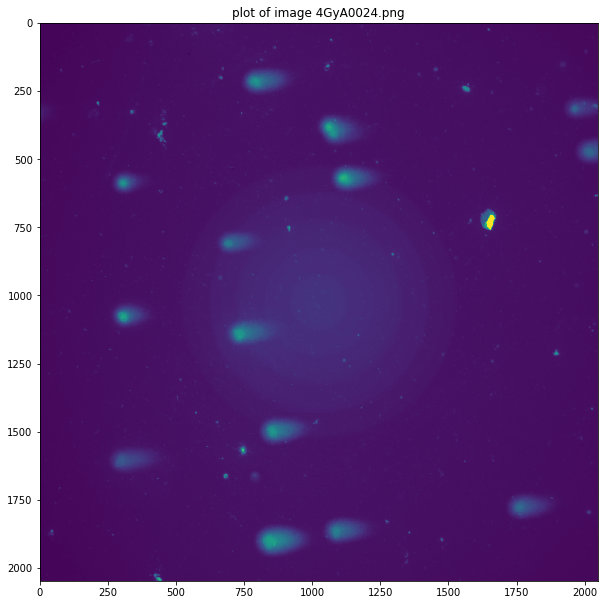

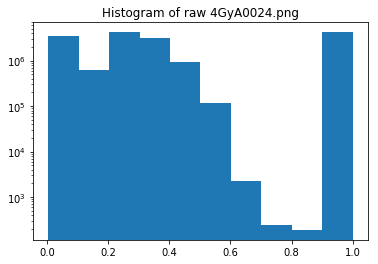

/home/selina/anaconda3/lib/python3.5/site-packages/matplotlib/ticker.py:2206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


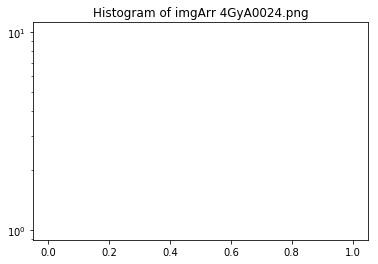

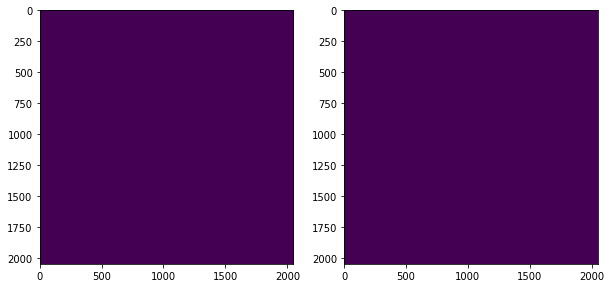

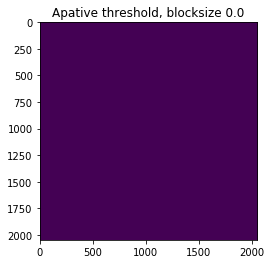

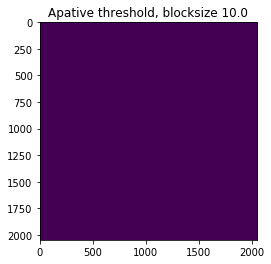

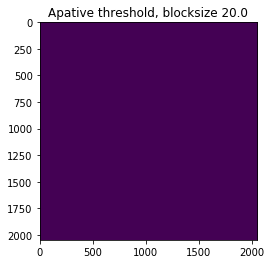

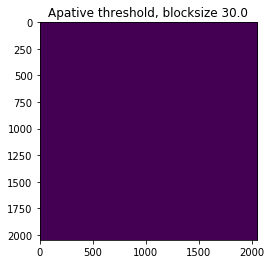

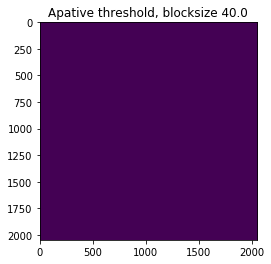

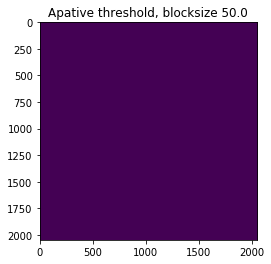

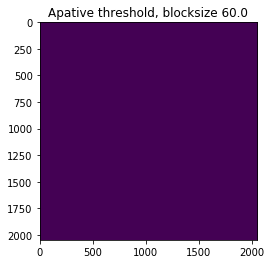

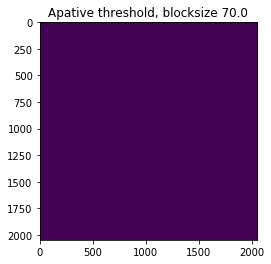

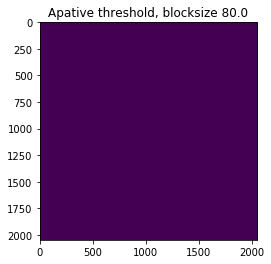

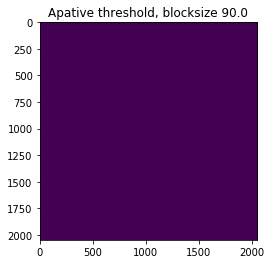

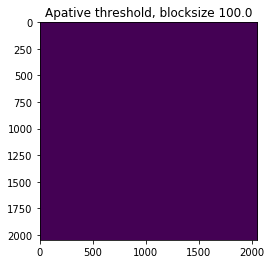

In [30]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import glob
import os
import sys
import cv2
import numpy as np
import scipy.ndimage as scimg
from skimage.filters import try_all_threshold, threshold_local
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import processing_defs as process
from scipy.ndimage.filters import convolve
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "4Gy 0h-4irrad_editBkg.bmp"  #3 channel issue with converted bmp with 3 channle (4Gy) image
#imFile = "4GyA0024-bkgEdit.png"   #issues with reading png file
#imFile = "../CometImages/4Gy/4Gy 0h-4irrad.bmp"
imFile = "4GyA0024.png"
fileName = [os.path.basename(x) for x in sorted(glob.glob(imFile))][0]
print(fileName)
fileNameSplit = os.path.splitext(fileName)  #without extension
print(fileNameSplit)
#
png = True
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
#
#print("analysing image ", fileList[n])
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates    
nCols = imgRaw.shape[1] # x ccordinates
maxPix = np.amax(imgRaw)
minPix = np.amin(imgRaw)
print("image shape, rows and cols are: ", shape, nRows, nCols)
print("max and min pixel values are: ", maxPix, minPix)
#
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
#
# Determine image format and process accordingly
if nDepth == 4:
    imgRGB = process.rgba2rgb(imgRaw)
    imgGrey = process.rgb2grey(imgRGB, 1)
elif nDepth == 3:
    imgRGB = imgRaw
    imgGrey = process.rgb2grey(imgRGB, 1)
elif nDepth == 1:
    imgRGB = imgRaw
    imgGrey = imgRaw
else:
    print(" ")
    print("Unexpected image depth",nDepth)
    sys.stop()
#
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgGrey[:, :]

#
#global threshold
if png == True:
    #thresh = [0.2, 0.8]
    thresh = [40, 80]
    #imgArr = imgArr / 255
else:
    thresh = [40, 80]
nThresh = len(thresh)
imgThr = np.zeros((nRows, nCols, nThresh))
imgThr[:, :, 0] = imgArr > thresh[0]
imgThr[:, :, 1] = imgArr > thresh[1]
#
print("imgRaw: ", imgRaw)
print("imgArr: ", imgArr)
#
fig = plt.figure(figsize = (10,12))
plt.title("plot of image " + str(fileName))
plt.imshow(imgRaw)
plt.show()
#
#plot histogram of intesnities
fig, ax = plt.subplots(1)
plt.title("Histogram of raw " + str(fileName))
n, bins, patches = ax.hist(imgRaw.flatten(), log=True)
                           #bins=np.arange(0, maxPix+1, 1), log=True)
plt.show()
#plot histogram of intesnities
fig, ax = plt.subplots(1)
plt.title("Histogram of imgArr " + str(fileName))
n, bins, patches = ax.hist(imgArr.flatten(), bins=np.arange(0, maxPix+1, 1), log=True)
plt.show()
#
fig = plt.figure(figsize = (10,12))
plt.title(fileName + " at threshold "+ str(thresh[0]) + "and "+ str(thresh[1]))
plt.subplot(1, 2, 1)
plt.imshow(imgThr[:, :,0])
plt.subplot(1, 2, 2)
plt.imshow(imgThr[:, :,1])
plt.show()
#
#adaptive threshold
blocksize = np.linspace(0, 100,11)
nBlocks = len(blocksize)
for n in range(0, nBlocks):
    threshLocal = threshold_local(imgArr, block_size  = blocksize[n]+1, method = 'gaussian') #gaussian method
    imgLocal = imgArr > threshLocal
    plt.title("Apative threshold, blocksize " + str(blocksize[n]))
    plt.imshow(imgLocal)
    plt.show()
